### 7.FIFA 19 DATA ANALYSIS

Write a python program that takes a real-life dataset of FIFA 19 players as input, and performs descriptive analytics on it. 

The program should be able to:

Analyze how different player attributes affect the overall rating. 

Identify the players with the highest overall rating. 

Determine which attributes are most important for determining the overall rating

In [17]:
import pandas as pd 
import numpy as np

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r"C:\Users\Ashwini\Downloads\archive\kl.csv",encoding='Windows-1252')
data.head(5)



Unnamed: 0      ID               Name   Age  \
0           0  158023           L. Messi  31.0   
1           1   20801  Cristiano Ronaldo  33.0   
2           2  190871          Neymar Jr  26.0   
3           3  193080             De Gea  27.0   
4           4  192985       K. De Bruyne  27.0   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png     94.0         94   
1  https://cdn.sofifa.org/flags/38.png     94.0         94   
2  https://cdn.sofifa.org/flags/54.png     92.0         93   
3  https://cdn.sofifa.org/flags/45.png     91.0         93   
4   https://cdn.sofifa.org/flags/7.png     91.0         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [18]:
data.columns = data.columns.str.replace(' ','')

In [19]:
data.drop("Unnamed:0",axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       18207 non-null  int64  
 1   Name                     18207 non-null  object 
 2   Age                      18206 non-null  float64
 3   Photo                    18207 non-null  object 
 4   Nationality              18207 non-null  object 
 5   Flag                     18207 non-null  object 
 6   Overall                  18206 non-null  float64
 7   Potential                18207 non-null  int64  
 8   Club                     17966 non-null  object 
 9   ClubLogo                 18207 non-null  object 
 10  Value                    18207 non-null  object 
 11  Wage                     18207 non-null  object 
 12  Special                  18207 non-null  int64  
 13  PreferredFoot            18159 non-null  object 
 14  InternationalReputatio

In [21]:
def Convert(x):
    if 'M' in  x:
        x = x * 1000000
        return x
    if 'K' in x:
        x = x * 1000
        return x
    else:
        return x

#### Convert Value Column

In [22]:
data.Value = data.Value.apply(lambda x: x.replace("€",""))
data.Value = data.Value.apply(lambda x: x.replace("M",""))
data.Value = data.Value.apply(lambda x: x.replace("K",""))
data["Value"] = data["Value"].apply(lambda x: float(x))
data["Value"] = data["Value"].transform(Convert)

#### Convert Wage Column

In [23]:
data.Wage = data.Wage.apply(lambda x: x.replace("€",""))
data.Wage = data.Wage.apply(lambda x: x.replace("M",""))
data.Wage = data.Wage.apply(lambda x: x.replace("K",""))
data["Wage"] = data["Wage"].apply(lambda x: float(x))
data["Wage"] = data["Wage"].transform(Convert)

#### Convert Height Column

In [24]:
data.Height = data.Height.apply(lambda x: str(x).replace("'","."))
data["Height"] = data["Height"].apply(lambda x: float(x))

### Convert Weight Column

In [25]:
data.Weight = data.Weight.apply(lambda x: str(x).replace("lbs",""))
data["Weight"] = data["Weight"].apply(lambda x: float(x))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       18207 non-null  int64  
 1   Name                     18207 non-null  object 
 2   Age                      18206 non-null  float64
 3   Photo                    18207 non-null  object 
 4   Nationality              18207 non-null  object 
 5   Flag                     18207 non-null  object 
 6   Overall                  18206 non-null  float64
 7   Potential                18207 non-null  int64  
 8   Club                     17966 non-null  object 
 9   ClubLogo                 18207 non-null  object 
 10  Value                    18207 non-null  float64
 11  Wage                     18207 non-null  float64
 12  Special                  18207 non-null  int64  
 13  PreferredFoot            18159 non-null  object 
 14  InternationalReputatio

In [27]:
grp_nationality  = data.groupby("Nationality").mean().reset_index() # resetting index to capture the column category
Nationality  = grp_nationality.Nationality
Overall4Nationality = grp_nationality.Overall
Potential4Nationality=grp_nationality.Potential

print(Potential4Nationality)
print(grp_nationality )

0      67.750000
1      71.700000
2      72.983333
3      64.000000
4      71.533333
         ...    
159    67.500000
160    73.149254
161    69.968992
162    73.777778
163    72.461538
Name: Potential, Length: 164, dtype: float64
     Nationality             ID        Age    Overall  Potential       Value  \
0    Afghanistan  234743.500000  22.500000  61.000000  67.750000  342.500000   
1        Albania  221682.450000  24.025000  65.925000  71.700000  294.377500   
2        Algeria  206355.716667  27.050000  70.633333  72.983333  232.026667   
3        Andorra  192937.000000  28.000000  62.000000  64.000000  290.000000   
4         Angola  206676.000000  25.866667  67.600000  71.533333  306.713333   
..           ...            ...        ...        ...        ...         ...   
159   Uzbekistan  189585.000000  29.500000  67.500000  67.500000  103.000000   
160    Venezuela  224879.641791  24.313433  67.268657  73.149254  227.385075   
161        Wales  201690.651163  24.736434  64.1

In [28]:
df = data.groupby(["Nationality"])["Nationality"].count()
print(df)

Nationality
Afghanistan      4
Albania         40
Algeria         60
Andorra          1
Angola          15
              ... 
Uzbekistan       2
Venezuela       67
Wales          129
Zambia           9
Zimbabwe        13
Name: Nationality, Length: 164, dtype: int64


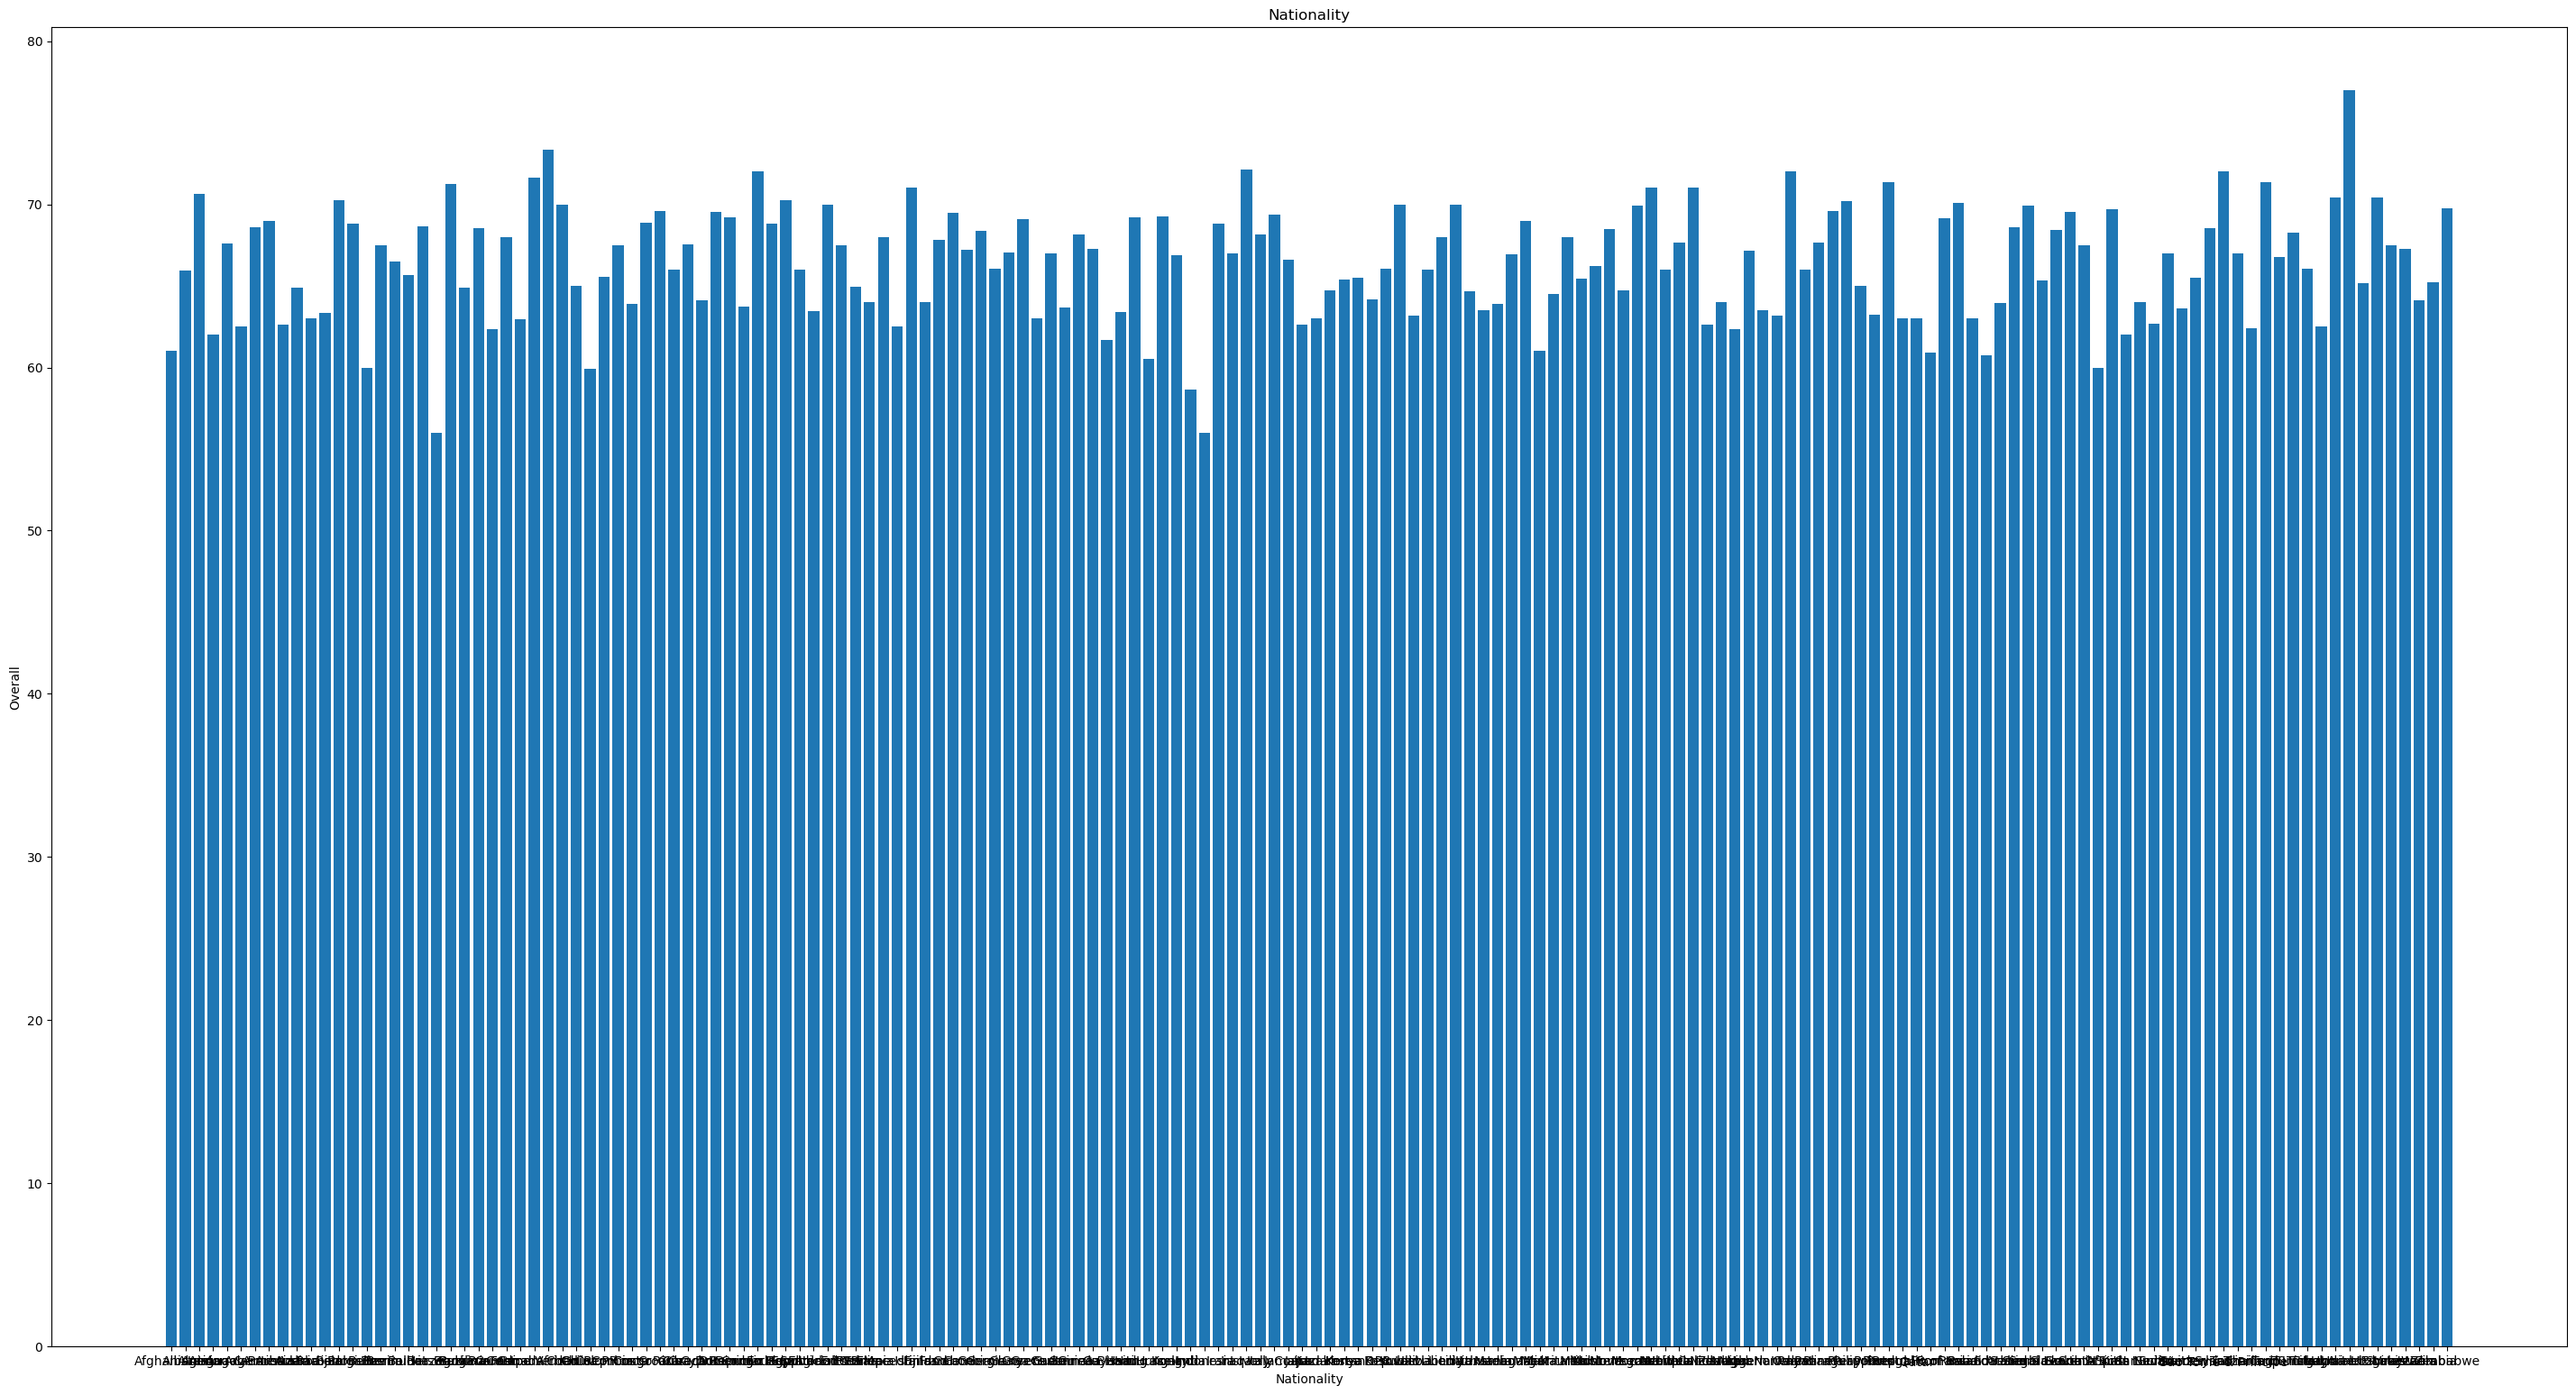

In [29]:
plt.figure(figsize=(36,19))
plt.title('Nationality')
plt.bar(Nationality,Overall4Nationality)
plt.xlabel("Nationality")
plt.ylabel("Overall")
#plt.xticks(rotation=90)
plt.show()

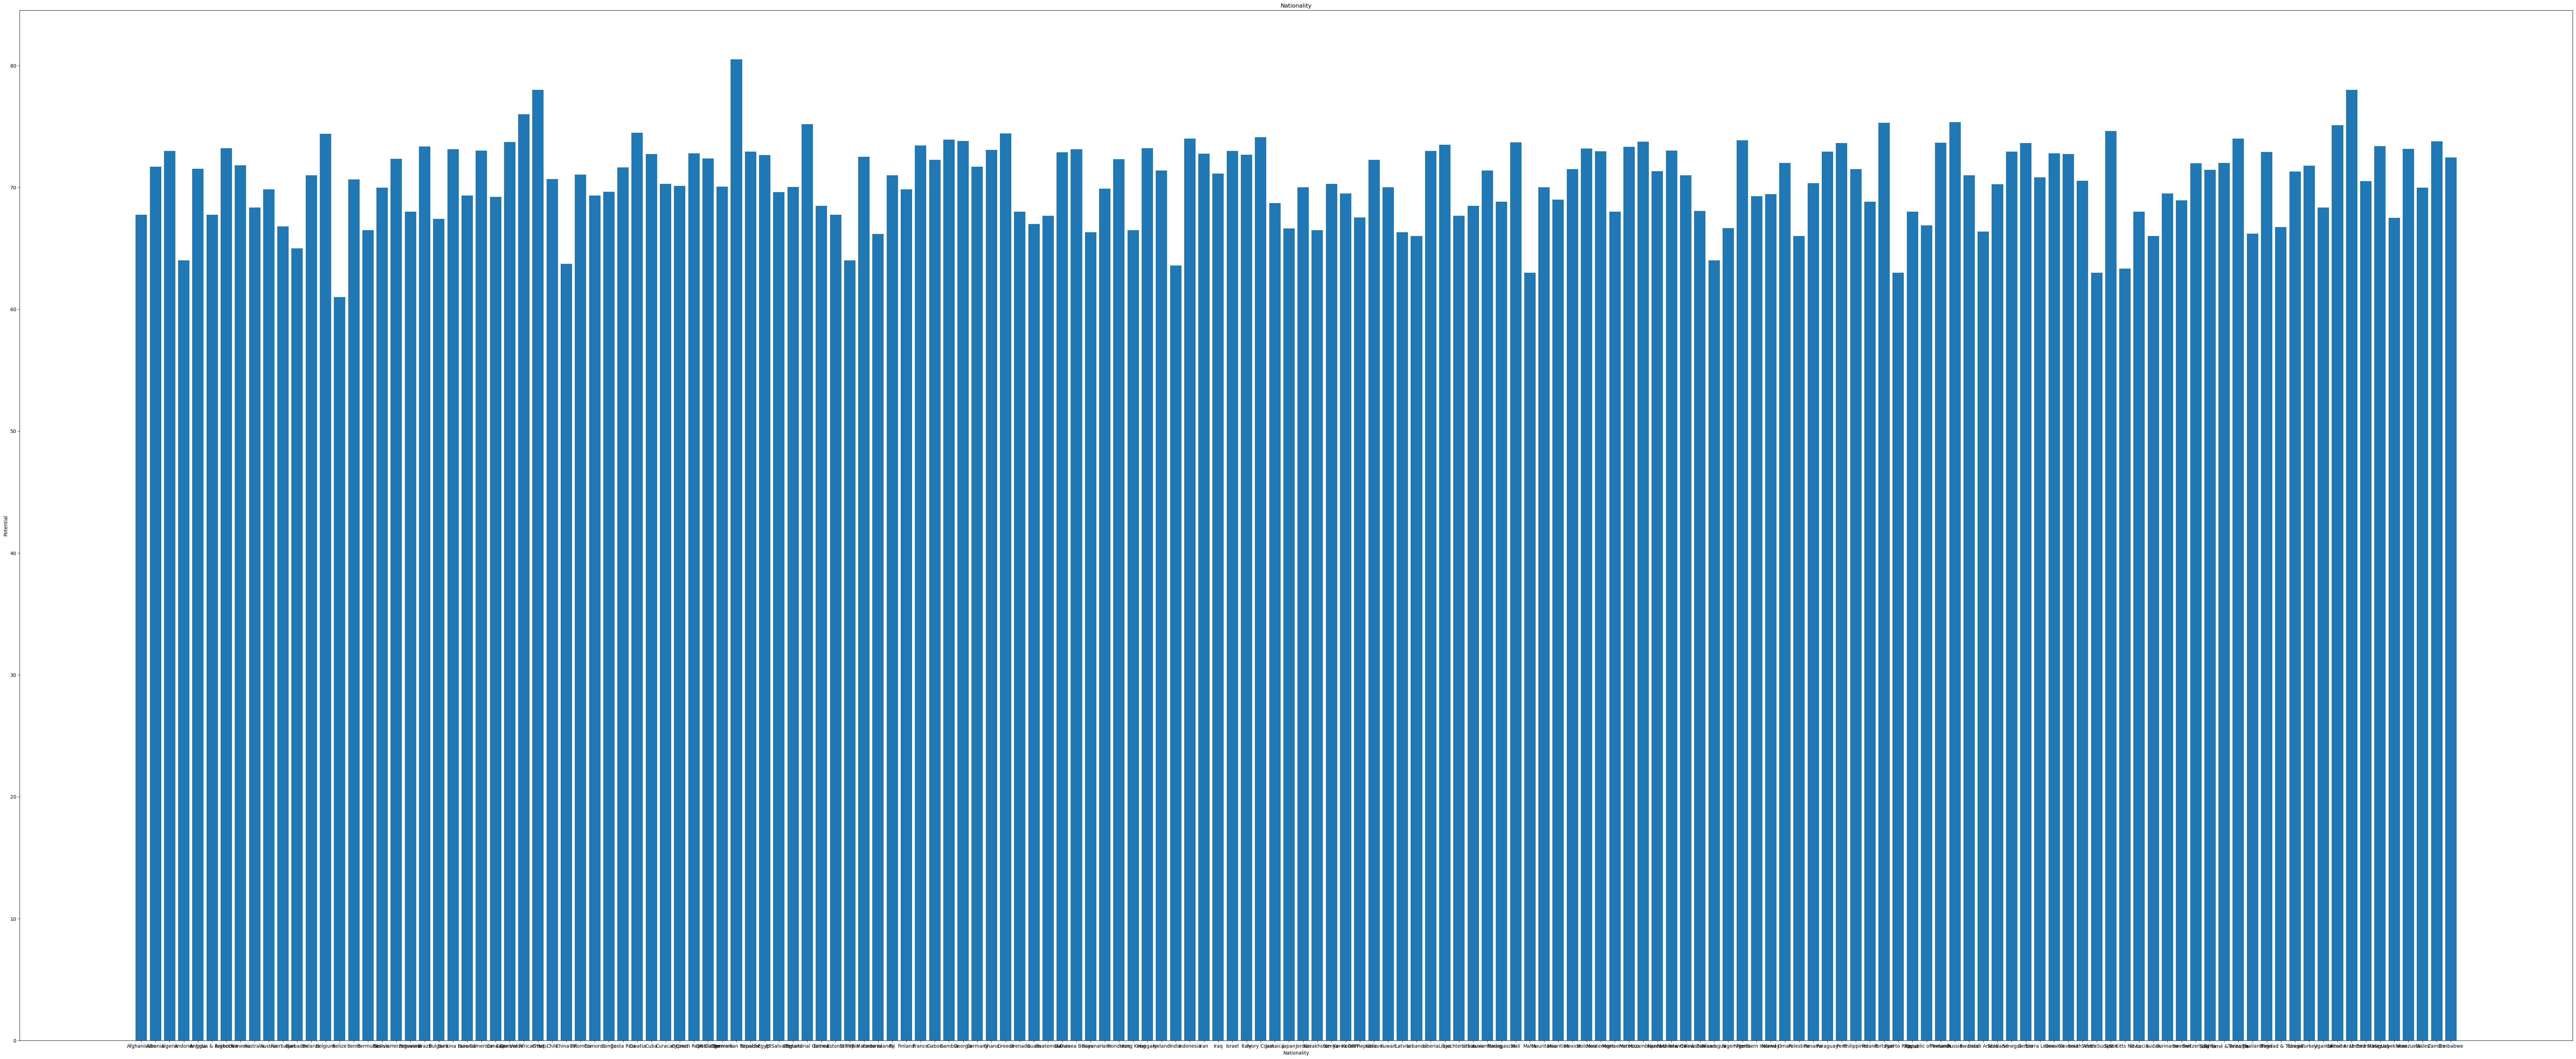

In [30]:
plt.figure(figsize=(96,39))
plt.title('Nationality')
plt.bar(Nationality,Potential4Nationality)
plt.xlabel("Nationality")
plt.ylabel("Potential")
#plt.xticks(rotation=90)
plt.show()

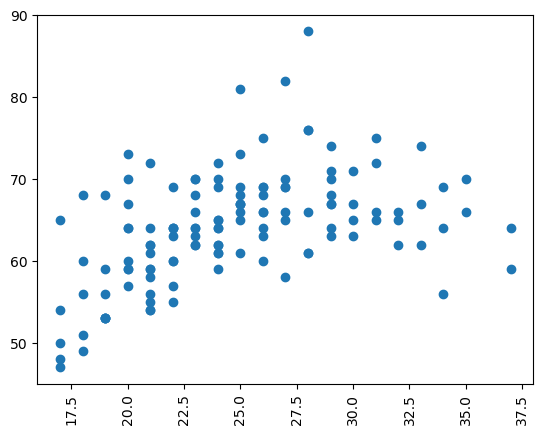

In [31]:
x= data.groupby("Nationality").get_group("Wales").reset_index()
#print (x)
A= [x.Age]
O = [x.Overall]
plt.xticks(rotation=90)


#plt.scatter(P,M)
plt.scatter(A,O)

In [32]:
#x= data.groupby("Nationality").get_group("Wales").reset_index()
#print (x)
A= [data.Age]
O = [data.Overall]
plt.xticks(rotation=90)


#plt.scatter(P,M)
plt.scatter(A,O)

In [34]:
import seaborn as sns

sns.jointplot(x=data['Age'], y=data['Potential'],
              joint_kws={'alpha':0.1,'s':7,'color':'red'}, 
              marginal_kws={'color':'blue'})

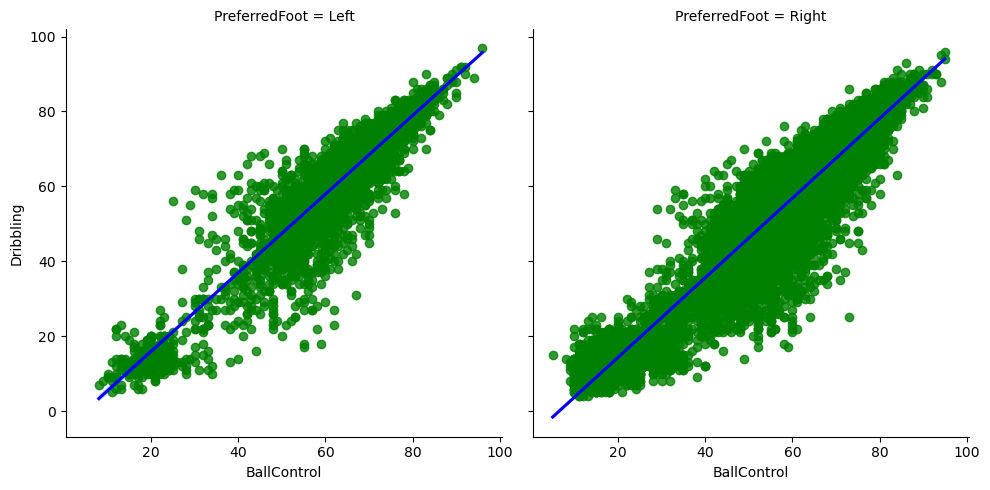

In [35]:
sns.lmplot(x = 'BallControl', y = 'Dribbling',data = data, col = 'PreferredFoot',scatter_kws = {'alpha':0.8,'color':'green'},
           line_kws={'color':'blue'})

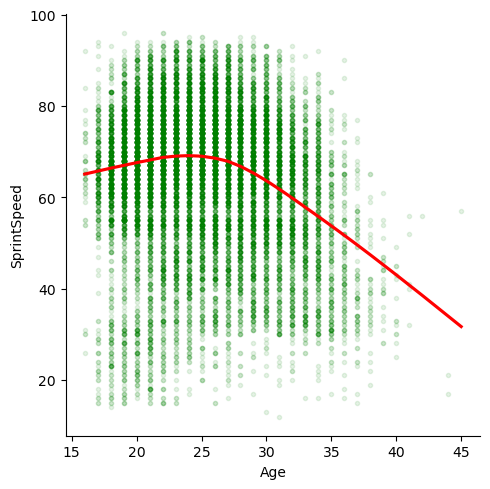

In [36]:
sns.lmplot(data = data, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.1, 's':9,'color':'green'}, 
           line_kws={'color':'red'})

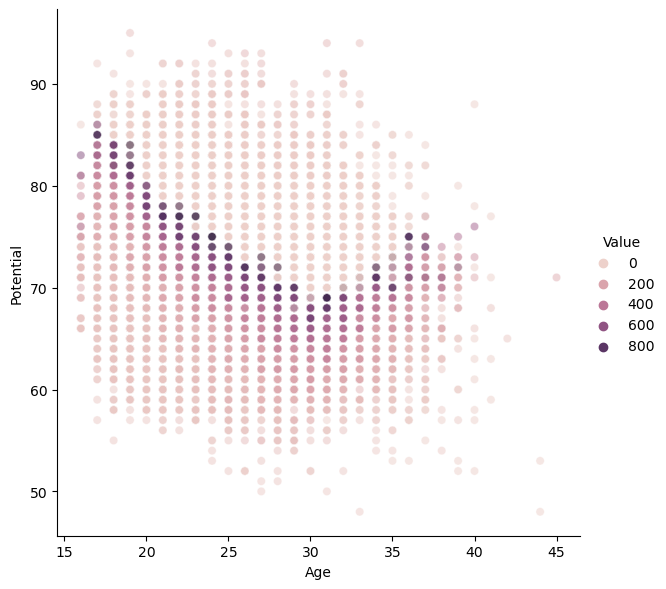

In [37]:
value = data.Value
cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value, 
            sizes=(40, 400), alpha=.5,
            height=6, data=data);

C:\Users\Ashwini\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


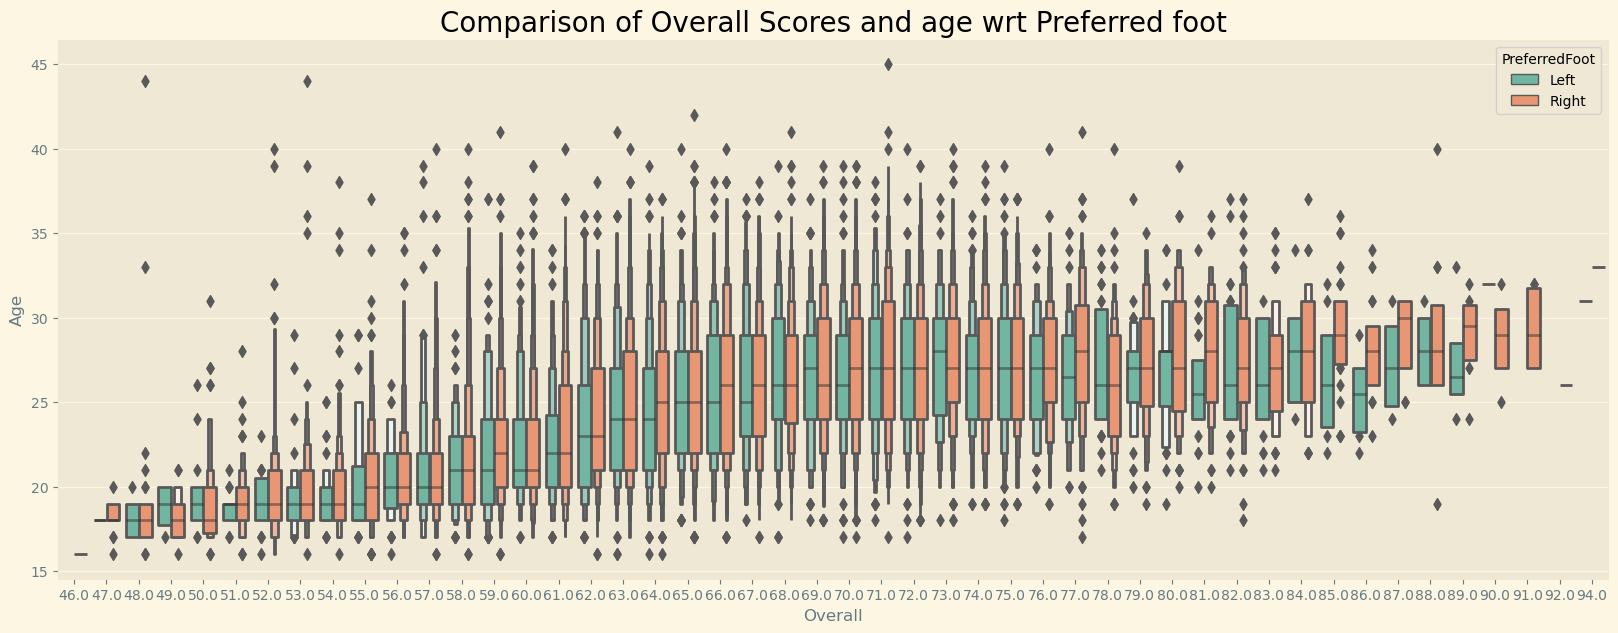

In [38]:
plt.rcParams['figure.figsize'] = (20, 7)
#plt.style.use('seaborn-dark-palette')
#plt.style.use('dark_background')
plt.style.use('Solarize_Light2')

sns.boxenplot(data['Overall'], data['Age'], hue = data['PreferredFoot'],palette = 'Set2')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20,color = 'black')
plt.show()

In [39]:
plt.style.use('seaborn-dark-palette')
sns.distplot(data['Age'])

C:\Users\Ashwini\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

In [40]:
b=data['Age'].quantile(0.98)
data= data[data['Age']<b]
sns.distplot(data['Age'])

C:\Users\Ashwini\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

<AxesSubplot:xlabel='Overall', ylabel='Count'>

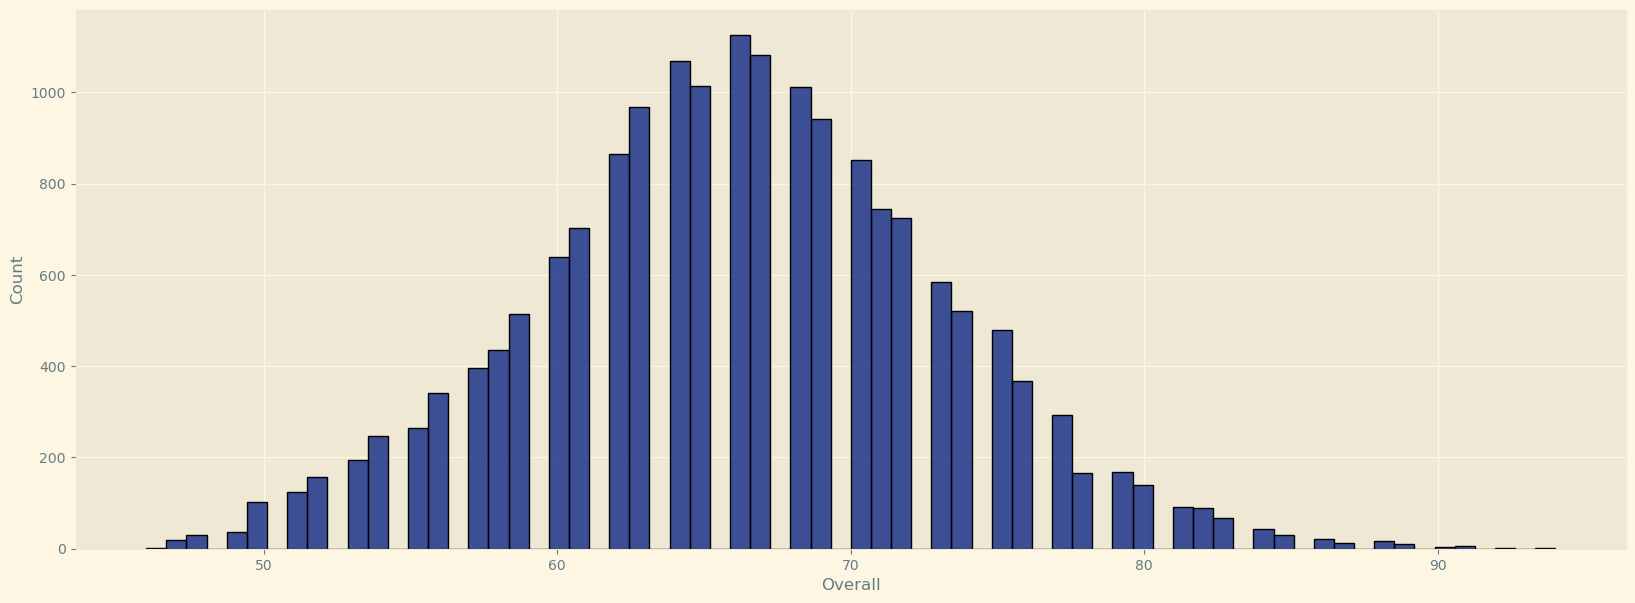

In [41]:
sns.histplot(data['Overall'])

<AxesSubplot:xlabel='Overall', ylabel='Count'>

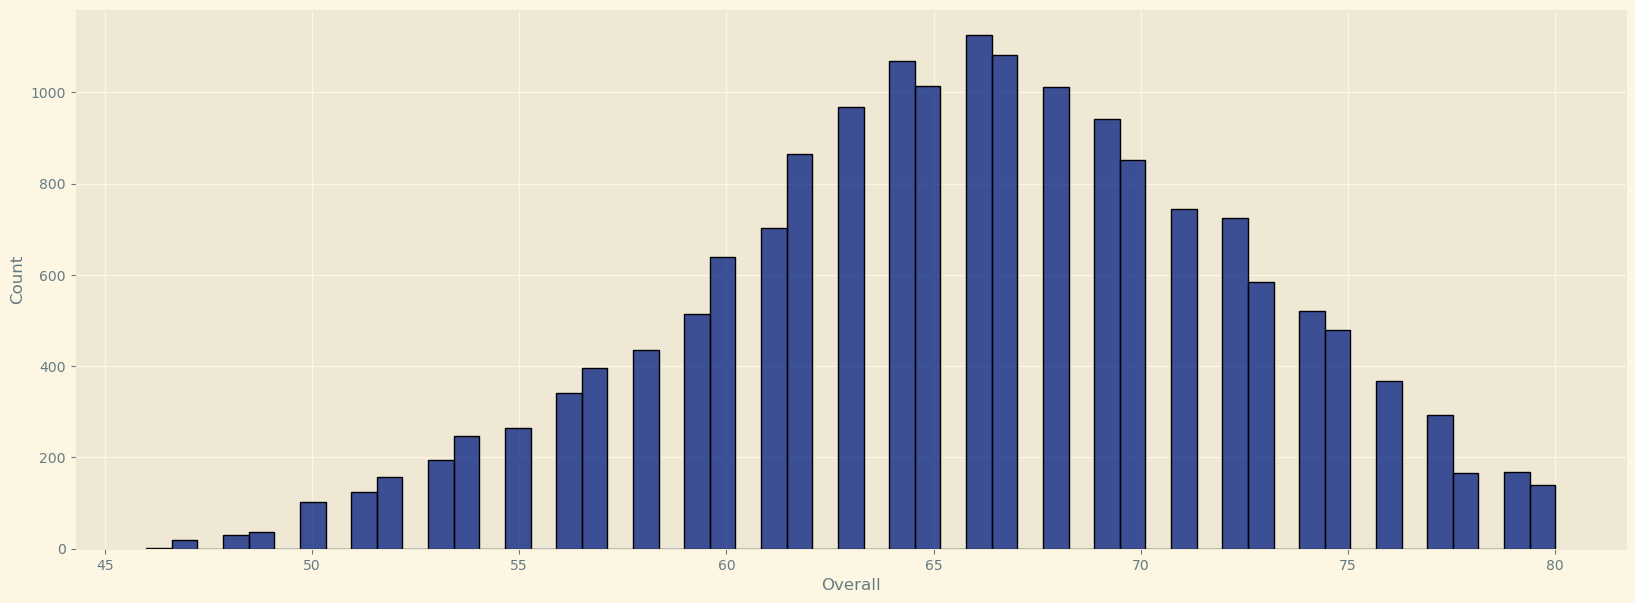

In [42]:
c=data['Overall'].quantile(0.98)
data= data[data['Overall']<c]
sns.histplot(data['Overall'])

In [44]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','PreferredFoot']
data_small = data[cols]

In [45]:
data.describe().T

count           mean           std    min  \
ID                       17320.0  217072.364203  24964.178401  768.0   
Age                      17320.0      24.756697      4.339807   16.0   
Overall                  17320.0      65.790358      6.471860   46.0   
Potential                17320.0      71.077483      5.788914   48.0   
Value                    17320.0     272.075294    291.761180    0.0   
Wage                     17320.0       7.641975     12.045530    0.0   
Special                  17320.0    1592.400404    264.765257  731.0   
InternationalReputation  17274.0       1.071611      0.283311    1.0   
WeakFoot                 17274.0       2.939389      0.654513    1.0   
SkillMoves               17274.0       2.355505      0.731705    1.0   
JerseyNumber             17263.0      19.817934     16.070392    1.0   
Height                   17274.0       5.793643      0.448182    5.1   
Weight                   17274.0     165.669503     15.469686  110.0   
Crossing                 17274.0      49.597256     17.939181    5.0   
Finishing                17274.0      45.391050     19.140734    2.0   
HeadingAccuracy          17274.0      52.255992     16.921199    4.0   
ShortPassing             17274.0      58.485817     14.263341    7.0   
Volleys                  17274.0      42.625275     17.191908    4.0   
Dribbling                17274.0      55.349832     18.419714    4.0   
Curve                    17274.0      46.918953     17.898604    6.0   
FKAccuracy               17274.0      42.547470     17.003573    3.0   
LongPassing              17274.0      52.448246     14.997613    9.0   
BallControl              17274.0      58.231157     16.189733    5.0   
Acceleration             17274.0      64.946162     14.607162   12.0   
SprintSpeed              17274.0      65.071726     14.331116   12.0   
Agility                  17274.0      63.594304     14.595606   14.0   
Reactions                17274.0      61.290668      8.587856   21.0   
Balance                  17274.0      64.063043     13.987440   16.0   
ShotPower                17274.0      55.265601     16.851725    2.0   
Jumping                  17274.0      64.981070     11.725899   15.0   
Stamina                  17274.0      63.422716     15.553564   13.0   
Strength                 17274.0      65.103566     12.567073   17.0   
LongShots                17274.0      46.863668     18.826964    3.0   
Aggression               17274.0      55.654394     17.202350   11.0   
Interceptions            17274.0      46.520088     20.468181    3.0   
Positioning              17274.0      49.849311     19.045769    2.0   
Vision                   17274.0      52.987496     13.806566   10.0   
Penalties                17274.0      48.328239     15.295675    5.0   
Composure                17274.0      58.078615     11.070218    3.0   
Marking                  17274.0      47.174598     19.618720    4.0   
StandingTackle           17274.0      47.683802     21.379340    2.0   
SlidingTackle            17274.0      45.675640     21.026965    3.0   
GKDiving                 17274.0      16.193528     17.037788    1.0   
GKHandling               17274.0      15.965439     16.215821    1.0   
GKKicking                17274.0      15.832986     15.891212    1.0   
GKPositioning            17274.0      15.937536     16.281322    1.0   
GKReflexes               17274.0      16.282042     17.299926    1.0   

                               25%       50%        75%       max  
ID                       202533.75  223211.0  237184.75  246620.0  
Age                          21.00      24.0      28.00      34.0  
Overall                      62.00      66.0      70.00      80.0  
Potential                    67.00      71.0      75.00      92.0  
Value                         4.20     170.0     500.00     975.0  
Wage                          1.00       3.0       8.00     140.0  
Special                    1458.00    1630.0    1777.00    2265.0  
InternationalReputation   

In [46]:
data_small

Age  Overall  Potential  Acceleration  SprintSpeed  Agility  Stamina  \
412    21.0     80.0         85          61.0         65.0     45.0     71.0   
413    19.0     80.0         89          77.0         86.0     78.0     73.0   
414    21.0     80.0         89          84.0         76.0     83.0     78.0   
415    20.0     80.0         90          79.0         79.0     81.0     79.0   
416    21.0     80.0         87          75.0         77.0     75.0     78.0   
...     ...      ...        ...           ...          ...      ...      ...   
18202  19.0     47.0         65          54.0         57.0     60.0     40.0   
18203  19.0     47.0         63          41.0         39.0     38.0     43.0   
18204  16.0     47.0         67          70.0         69.0     50.0     55.0   
18205  17.0     47.0         66          61.0         60.0     52.0     40.0   
18206  16.0     46.0         66          57.0         55.0     55.0     47.0   

       Strength PreferredFoot  
412        80.0         Right  
413        61.0          Left  
414        78.0         Right  
415        61.0         Right  
416        65.0         Right  
...         ...           ...  
18202      47.0         Right  
18203      67.0         Right  
18204      32.0         Right  
18205      48.0         Right  
18206      60.0         Right  

[17320 rows x 9 columns]

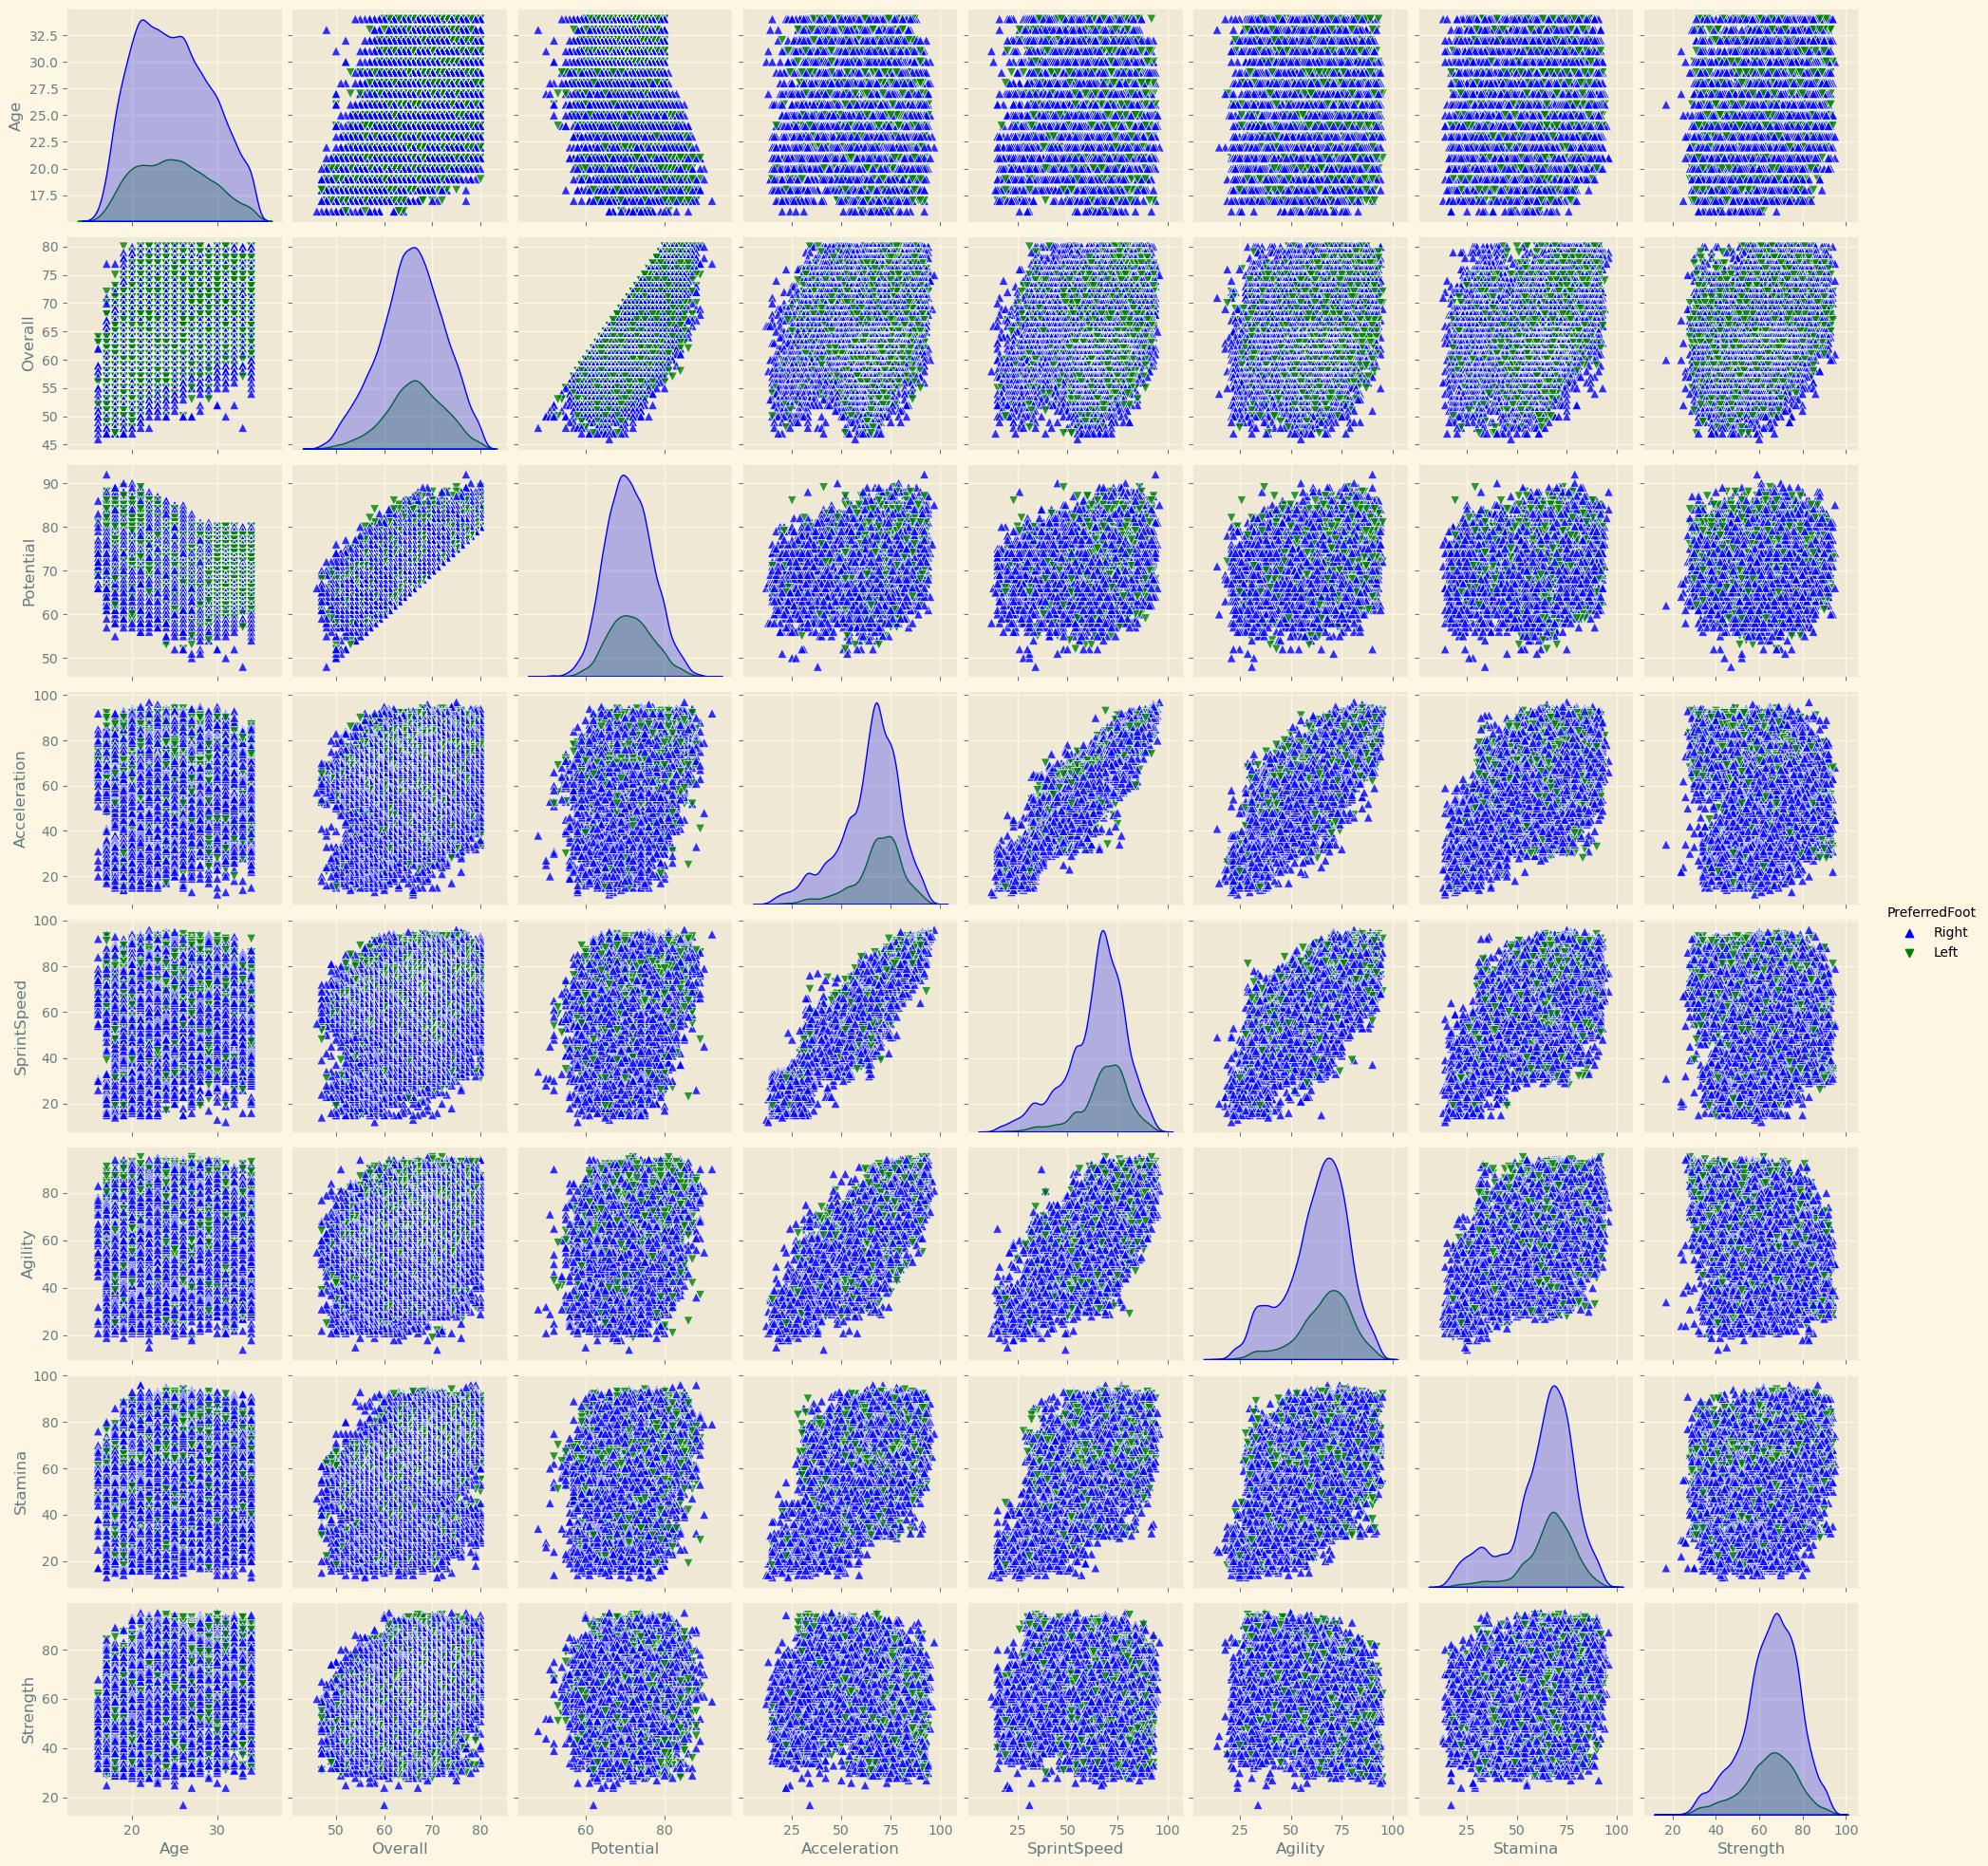

In [47]:
sns.pairplot(data_small, hue ='PreferredFoot',palette=["blue", "green"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

In [48]:
data_dummies=pd.get_dummies(data_small,drop_first=True)

In [49]:
nat_counts = data.Nationality.value_counts()
print(nat_counts)

England                1604
Germany                1150
Spain                   985
Argentina               863
France                  855
                       ... 
Kuwait                    1
New Caledonia             1
Fiji                      1
São Tomé & Príncipe       1
Botswana                  1
Name: Nationality, Length: 163, dtype: int64
